## Домашнє завдання: Дерева прийняття рішень

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

Необхідні імпорти

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



Посилання на модуль у GitHub: https://github.com/alinashev/machine_learning_assignments/blob/main/module_2/topic_2_3/process_bank_churn.py


In [2]:
%load_ext autoreload
%autoreload 2
from process_bank_churn import preprocess_data

Завантаження даних

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
file_name = '/content/drive/MyDrive/ML/data/bccp/train.csv'

In [5]:
raw_train_data = pd.read_csv(file_name)
raw_train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


Препроцесинг

In [6]:
X_train, y_train, X_val, y_val, input_cols, scaler, encoder = preprocess_data(
    raw_df=raw_train_data,
    target_col = 'Exited',
    unnecessary_columns=['Surname', 'id',	'CustomerId'],
    scaler_numeric = False
    )

In [7]:
display(X_train.head(3)), display(X_val.head(3))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
10393,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
80,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,714.0,46.0,1.0,115764.32,4.0,1.0,1.0,72945.32,0.0,1.0,0.0,0.0,1.0
3646,593.0,41.0,5.0,0.00,2.0,1.0,1.0,38196.24,1.0,0.0,0.0,0.0,1.0
5306,731.0,38.0,2.0,0.00,2.0,0.0,1.0,116971.05,1.0,0.0,0.0,1.0,0.0


(None, None)

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [8]:
model = DecisionTreeClassifier(random_state=42)

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
train_preds = model.predict(X_train)

In [11]:
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
print(f"Train ROC-AUC: {train_auc:.4f}")
print(f"Validation ROC-AUC: {test_auc:.4f}")

Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.7700


**Спостереження**:

Маємо значення метрики ROC-AUC на тренувальних даннх рівний 1, що говорить про явне перенавчання. В той же час значення на валідаційних даних значення метрики ROC-AUC - значно менше (0.77), отже модель погано генералізує.

In [12]:
print(f"Tree depth: {model.get_depth()}")

Tree depth: 26


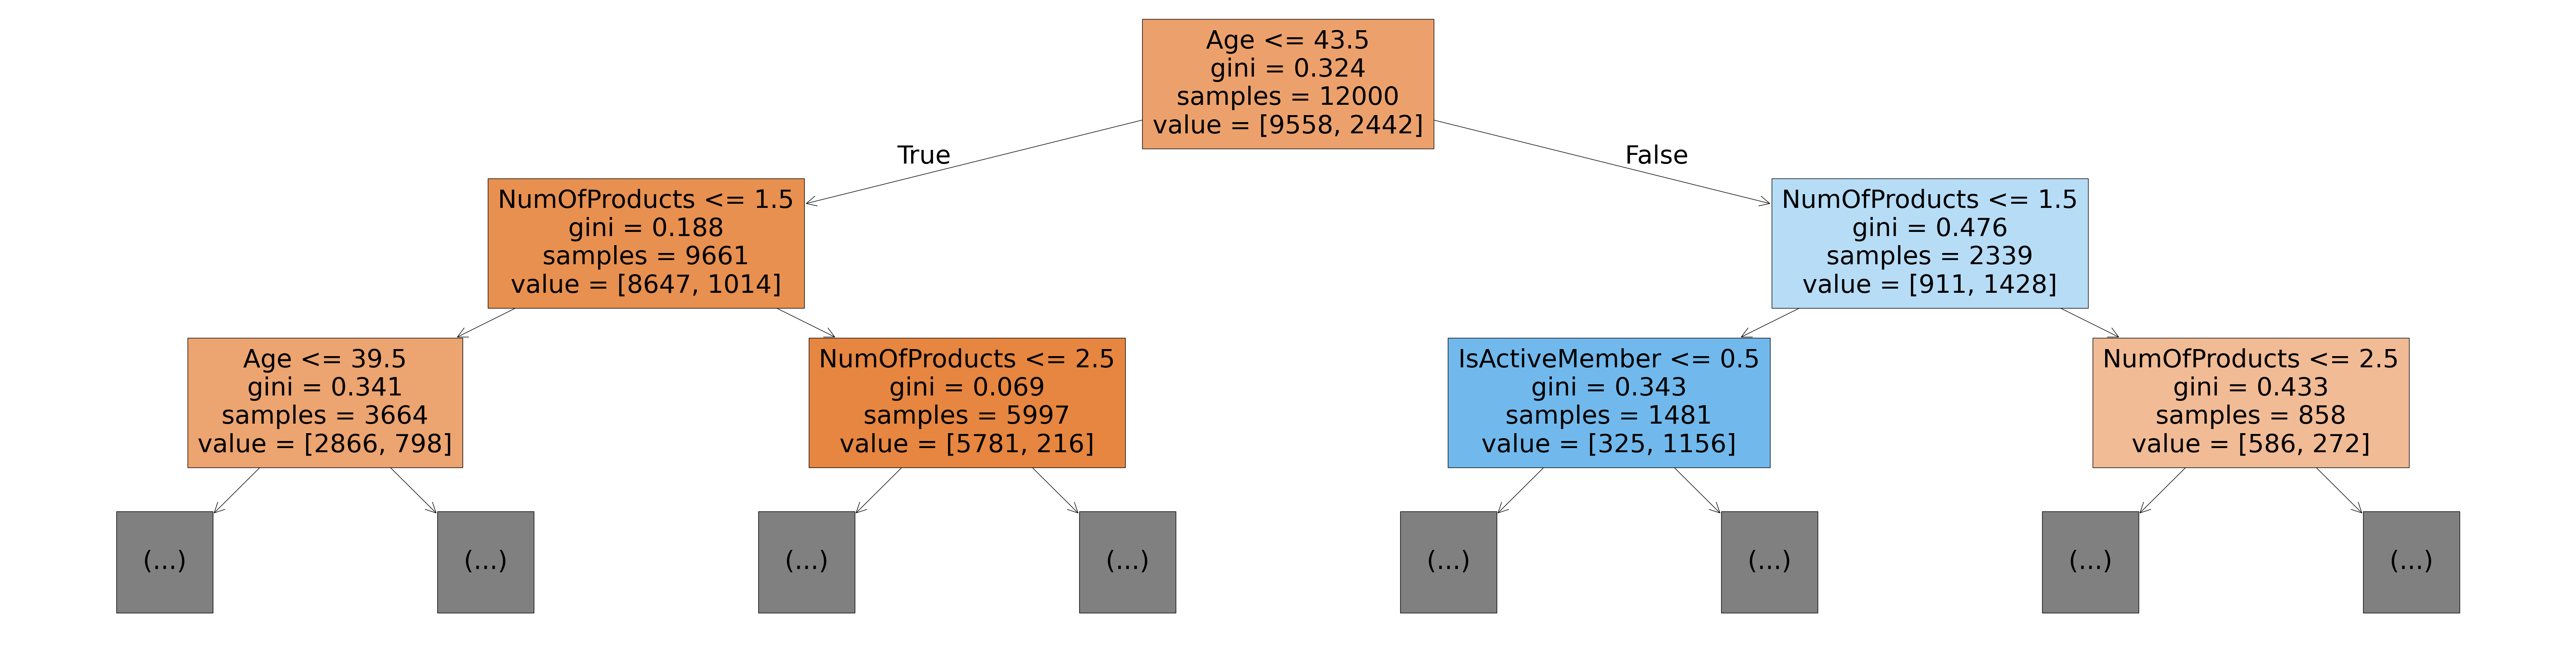

In [13]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);
plt.show()

**Спостереження**:

- Кореневим вузлом є правило для Age, отже Age є впливовою ознакою, що виконує початковий поділ. Використтання її свідчить про найбільший вплив на зменшиння вндексу Джині.  

- Також важливою ознакою є NumOfProducts, адже на другому рівні йде розбиття за цією ознакою, для обох категорій Age.


In [14]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


**Спостереження**:

- Бачимо, що Age є найпливовішою ознакою в моделі, що відображене і в побудованому дереві рішень, де ця ознака використана у кореневому вузлі.
- NumOfProducts - друга за важливістю ознака, та використовується в декількох вузлах дерева.

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [15]:
model_1 = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 5}).fit(X_train, y_train)

train_auc = roc_auc_score(y_train, model_1.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_val, model_1.predict_proba(X_val)[:, 1])
print(f"Train ROC-AUC: {train_auc:.4f}")
print(f"Validation ROC-AUC: {test_auc:.4f}")

Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.7658


In [16]:
model_2 = DecisionTreeClassifier(random_state=42, max_depth=8, max_leaf_nodes=45, class_weight={0: 1, 1: 5}).fit(X_train, y_train)

train_auc = roc_auc_score(y_train, model_2.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_val, model_2.predict_proba(X_val)[:, 1])
print(f"Train ROC-AUC: {train_auc:.4f}")
print(f"Validation ROC-AUC: {test_auc:.4f}")

Train ROC-AUC: 0.9307
Validation ROC-AUC: 0.9176


In [17]:
model_3 = DecisionTreeClassifier(random_state=42, max_depth=8, max_leaf_nodes=45).fit(X_train, y_train)

train_auc = roc_auc_score(y_train, model_3.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_val, model_3.predict_proba(X_val)[:, 1])
print(f"Train ROC-AUC: {train_auc:.4f}")
print(f"Validation ROC-AUC: {test_auc:.4f}")

Train ROC-AUC: 0.9305
Validation ROC-AUC: 0.9248


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [18]:
train_auc = []
val_auc = []
max_depth_range = range(1, 21)

for depth in max_depth_range:
  mdl = DecisionTreeClassifier(max_depth=depth, random_state=42)
  mdl.fit(X_train, y_train)
  train_auc.append(roc_auc_score(y_train, mdl.predict_proba(X_train)[:, 1]))
  val_auc.append(roc_auc_score(y_val, mdl.predict_proba(X_val)[:, 1]))


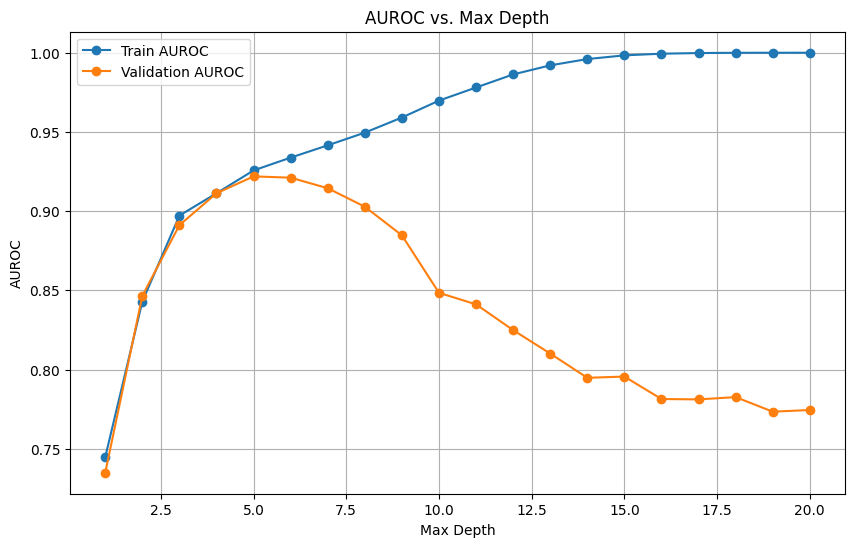

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_auc, label='Train AUROC', marker='o')
plt.plot(max_depth_range, val_auc, label='Validation AUROC', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('AUROC')
plt.title('AUROC vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [20]:
model_5d = DecisionTreeClassifier(random_state=42, max_depth=5).fit(X_train, y_train)

train_auc = roc_auc_score(y_train, model_5d.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_val, model_5d.predict_proba(X_val)[:, 1])
print(f"Train ROC-AUC: {train_auc:.4f}")
print(f"Validation ROC-AUC: {test_auc:.4f}")

Train ROC-AUC: 0.9257
Validation ROC-AUC: 0.9219


Найкращим значенням max_depth, що було знайдено на минулій ітерації - 5. Натренувавши модель на тренувальних та валідаційних даних - отримано вже кращі результати, ніж у найпершій моделі.

Явного перенавчання немає, різниця значеннь метрики ROC-AUC на обох наборах даних відрізняються не дуже сильно, отже модель достатньо непагано генералізує.

In [21]:
file_name = '/content/drive/MyDrive/ML/data/bccp/test.csv'
test_df = pd.read_csv(file_name)
test_df.head(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45


In [22]:
%load_ext autoreload
%autoreload 2
from process_bank_churn import preprocess_new_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
proc_test_df = preprocess_new_data(
    new_df = test_df,
    encoder = encoder,
    scaler = None,
    unnecessary_columns = ['Surname']
)
proc_test_df.head(3)

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15000,15594796.0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
1,15001,15642821.0,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
2,15002,15716284.0,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0


In [24]:
model = model_5d

In [25]:
proc_test_df['Exited'] = model.predict_proba(proc_test_df[input_cols])[:,1]
proc_test_df.head(3)

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0,0.237911
1,15001,15642821.0,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0,0.027613
2,15002,15716284.0,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0,0.027613


In [26]:
file_name = '/content/drive/MyDrive/ML/data/bccp/sample_submission.csv'
sample = pd.read_csv(file_name)

In [27]:
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
sub_path = 'drive/My Drive/ML/data/bccp/lab/submission'

In [28]:
upd_sample = sample.copy()
upd_sample.head(3)

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5


In [29]:
upd_sample['Exited'] = upd_sample['id'].map(proc_test_df.set_index('id')['Exited'])
upd_sample.head(3)

,id,Exited
0,15000,0.237911
1,15001,0.027613
2,15002,0.027613


In [30]:
upd_sample.to_csv(f'{sub_path}/submission_{timestamp}.csv', index=False)

Скрін зі змагання

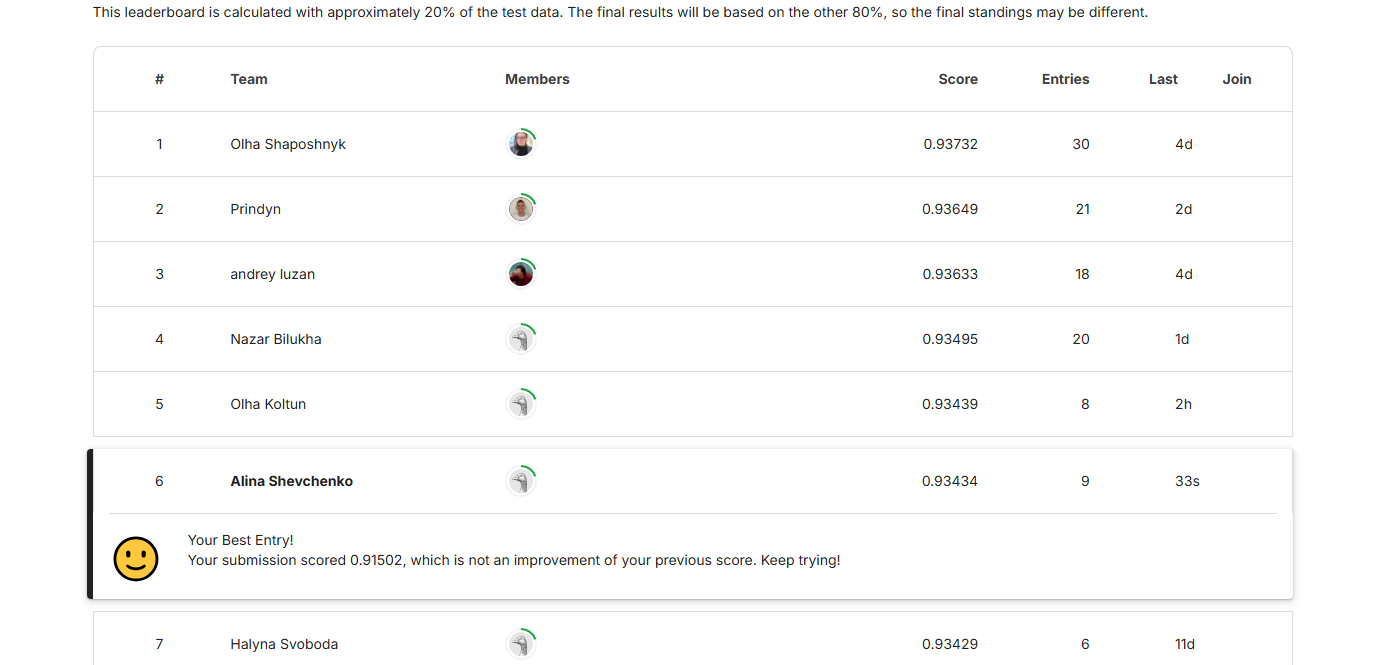


**Спостереження**:

З налаштуваннями моделі з завдання отримані дещо гірші результати, ніж з використаннями логістичної регресії. Але все ж таки прогнозувальна здатність моделі на даних які модель не бачила - достатньо непогані (0.91502).